In [28]:
pip install pandas openpyxl xlsxwriter tabulate

1743.40s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [ ]:
# -------------------------------------
# 1. Datos Diapositivas 13 a 17 Ruta 2: 
# -------------------------------------
datos = [
    95, 57, 76, 76, 76, 63, 65, 79, 60, 67, 
    79, 71, 72, 88, 84, 82, 96, 87, 87, 65, 
    77, 58, 54, 82, 86, 81, 63, 82, 92, 75
]

# -----------------------------
# 2. Número de clases (k)
# -----------------------------
n = len(datos)  # cantidad de datos
k = math.ceil(math.sqrt(n))  # raíz de n y redondeo hacia arriba
print("Número de clases (k):", k)

# -----------------------------
# 3. Rango y amplitud
# -----------------------------
min_val = min(datos)
max_val = max(datos)
rango = max_val - min_val
amplitud = math.ceil(rango / k)  # redondeo hacia arriba
print("Rango:", rango, "Amplitud:", amplitud)

# -----------------------------
# 4. Construcción de intervalos
# -----------------------------
intervalos = []
inicio = min_val
for i in range(k):
    fin = inicio + amplitud
    intervalos.append((inicio, fin))
    inicio = fin

# -----------------------------
# 5. Cálculo de frecuencias
# -----------------------------
tabla = []
N = 0  # acumulador de frecuencia absoluta
H = 0  # acumulador de frecuencia relativa

for (li, ls) in intervalos:
    # frecuencia absoluta ni
    ni = sum(li <= x < ls for x in datos)
    N += ni  # frecuencia absoluta acumulada
    hi = ni / n  # frecuencia relativa
    H += hi  # frecuencia relativa acumulada
    
    # marca de clase (punto medio)
    marca = (li + ls) / 2
    
    #tabla.append([f"{li}-{ls}", marca, ni, round(hi,2), N, round(H,2)])

    tabla.append([f"[{li}, {ls})", marca, ni, round(hi,3), N, round(H,3)])


# Ajuste final: la última frecuencia relativa acumulada debe ser 1
tabla[-1][5] = 1.00

# -----------------------------
# 6. Crear DataFrame
# -----------------------------
df = pd.DataFrame(tabla, columns=[
    "Clase", "Marca de clase", "ni", "hi", "Ni", "Hi"
])

# -----------------------------
# 7. Mostrar tabla en consola
# -----------------------------
print("\nTabla de frecuencias agrupadas:\n")

#print(df.to_string(index=False))

# Mostrar tabla con líneas tipo cuadrícula
from tabulate import tabulate

# Definir alineación de columnas (todas centradas)
alineacion = ["center"] * len(df.columns)

# Mostrar tabla con cuadrícula y valores centrados
print(tabulate(df, headers="keys", tablefmt="grid", showindex=False, colalign=alineacion))

# -----------------------------
# 8. Exportar a Excel con estilo
# -----------------------------
with pd.ExcelWriter("tabla_frecuencias.xlsx", engine="xlsxwriter") as writer:
    df.to_excel(writer, sheet_name="Frecuencias", index=False)
    
    # aplicar formato bonito
    workbook = writer.book
    worksheet = writer.sheets["Frecuencias"]
    
    formato = workbook.add_format({
        "align": "center",
        "valign": "vcenter",
        "border": 1
    })
    
    # aplicar formato a todas las celdas
    worksheet.set_column("A:F", 18, formato)

Número de clases (k): 6
Rango: 42 Amplitud: 7

Tabla de frecuencias agrupadas:

+----------+------------------+------+-------+------+-------+
|  Clase   |  Marca de clase  |  ni  |  hi   |  Ni  |  Hi   |
+==========+==================+======+=======+======+=======+
| [54, 61) |       57.5       |  4   | 0.133 |  4   | 0.133 |
+----------+------------------+------+-------+------+-------+
| [61, 68) |       64.5       |  5   | 0.167 |  9   |  0.3  |
+----------+------------------+------+-------+------+-------+
| [68, 75) |       71.5       |  2   | 0.067 |  11  | 0.367 |
+----------+------------------+------+-------+------+-------+
| [75, 82) |       78.5       |  8   | 0.267 |  19  | 0.633 |
+----------+------------------+------+-------+------+-------+
| [82, 89) |       85.5       |  8   | 0.267 |  27  |  0.9  |
+----------+------------------+------+-------+------+-------+
| [89, 96) |       92.5       |  2   | 0.067 |  29  |   1   |
+----------+------------------+------+-------+------

In [ ]:
# -------------------------------------
# 1. Datos Diapositiva 20 Ruta 2: 
# -------------------------------------

datos = [
    95, 57, 76, 93, 86, 80, 89, 76, 76, 63, 74, 94, 96, 77, 65, 79, 60, 56, 72, 82, 70,
    67, 79, 71, 77, 52, 76, 68, 72, 88, 84, 70, 83, 93, 76, 82, 96, 87, 69, 89, 77, 81,
    87, 65, 77, 72, 56, 78, 78, 58, 54, 82, 82, 66, 73, 79, 86, 81, 63, 46, 62, 99, 93,
    82, 92, 75, 76, 90, 74, 67
]

# 2. Cálculo de parámetros estadísticos
n = len(datos)
min_val = min(datos)
max_val = max(datos)
rango = max_val - min_val

# Número de clases usando la raíz de n y redondeando al siguiente entero (math.ceil)
k = math.ceil(np.sqrt(n))

# Amplitud del intervalo (Rango / número de clases)
amplitud = math.ceil(rango / k)

print(f"Resumen: n={n}, Min={min_val}, Max={max_val}, Rango={rango}, Clases={k}, Amplitud={amplitud:.2f}\n")

# 3. Creación de los intervalos y la tabla
intervalos = []
limite_inferior = min_val

for i in range(k):
    limite_superior = limite_inferior + amplitud
    # Guardamos los límites y la marca de clase (punto medio)
    intervalos.append({
        'Clase': f"[{limite_inferior:.2f} - {limite_superior:.2f})",
        'Marca de Clase (xi)': (limite_inferior + limite_superior) / 2,
        'inf': limite_inferior,
        'sup': limite_superior
    })
    limite_inferior = limite_superior

df_tabla = pd.DataFrame(intervalos)

# 4. Cálculo de frecuencias
# Frecuencia Absoluta (ni)
def contar_frecuencia(row):
    # El último intervalo debe ser cerrado por ambos lados para incluir el valor máximo
    if row.name == k - 1:
        return sum(1 for x in datos if row['inf'] <= x <= row['sup'])
    return sum(1 for x in datos if row['inf'] <= x < row['sup'])

df_tabla['ni'] = df_tabla.apply(contar_frecuencia, axis=1)

# Frecuencia Relativa (hi)
df_tabla['hi'] = (df_tabla['ni'] / n).round(2)

# Frecuencia Absoluta Acumulada (Ni)
df_tabla['Ni'] = df_tabla['ni'].cumsum()

# Frecuencia Relativa Acumulada (Hi)
df_tabla['Hi'] = df_tabla['hi'].cumsum()

# 5. Limpieza visual de la tabla
tabla_final = df_tabla[['Clase', 'Marca de Clase (xi)', 'ni', 'hi', 'Ni', 'Hi']]

# Mostrar resultados en consola
print("TABLA DE FRECUENCIAS")
print(tabla_final.to_string(index=False))

# 6. Exportar a Excel
# Nota: Requiere tener instalada la librería 'openpyxl'
try:
    tabla_final.to_excel("tabla_frecuencias.xlsx", index=False)
    print("\nArchivo 'tabla_frecuencias.xlsx' generado con éxito.")
except Exception as e:
    print(f"\nNo se pudo generar el archivo Excel: {e}")

Resumen: n=70, Min=46, Max=99, Rango=53, Clases=9, Amplitud=6.00

TABLA DE FRECUENCIAS
           Clase  Marca de Clase (xi)  ni   hi  Ni   Hi
 [46.00 - 52.00)                 49.0   1 0.01   1 0.01
 [52.00 - 58.00)                 55.0   5 0.07   6 0.08
 [58.00 - 64.00)                 61.0   5 0.07  11 0.15
 [64.00 - 70.00)                 67.0   7 0.10  18 0.25
 [70.00 - 76.00)                 73.0  10 0.14  28 0.39
 [76.00 - 82.00)                 79.0  18 0.26  46 0.65
 [82.00 - 88.00)                 85.0  11 0.16  57 0.81
 [88.00 - 94.00)                 91.0   8 0.11  65 0.92
[94.00 - 100.00)                 97.0   5 0.07  70 0.99

Archivo 'tabla_frecuencias.xlsx' generado con éxito.


In [ ]:
# -------------------------------------
# 1. Datos Diapositiva 20 Ruta 2: 
# -------------------------------------
datos = [
    95,57,76,93,86,80,89,76,76,63,74,94,96,77,65,79,60,56,72,82,70,
    67,79,71,77,52,76,68,72,88,84,70,83,93,76,82,96,87,69,89,77,81,
    87,65,77,72,56,78,78,58,54,82,82,66,73,79,86,81,63,46,62,99,93,
    82,92,75,76,90,74,67
]

# -----------------------------
# 2. Número de clases (k)
# -----------------------------
n = len(datos)  # cantidad de datos
k = math.ceil(math.sqrt(n))  # raíz de n y redondeo hacia arriba
print("Número de clases (k):", k)

# -----------------------------
# 3. Rango y amplitud
# -----------------------------
min_val = min(datos)
max_val = max(datos)
rango = max_val - min_val
amplitud = math.ceil(rango / k)  # redondeo hacia arriba
print("Rango:", rango, "Amplitud:", amplitud)

# -----------------------------
# 4. Construcción de intervalos
# -----------------------------
intervalos = []
inicio = min_val
for i in range(k):
    fin = inicio + amplitud
    intervalos.append((inicio, fin))
    inicio = fin

# -----------------------------
# 5. Cálculo de frecuencias
# -----------------------------
tabla = []
N = 0  # acumulador de frecuencia absoluta
H = 0  # acumulador de frecuencia relativa

for (li, ls) in intervalos:
    # frecuencia absoluta ni
    ni = sum(li <= x < ls for x in datos)
    N += ni  # frecuencia absoluta acumulada
    hi = ni / n  # frecuencia relativa
    H += hi  # frecuencia relativa acumulada
    
    # marca de clase (punto medio)
    marca = (li + ls) / 2
    
    #tabla.append([f"{li}-{ls}", marca, ni, round(hi,2), N, round(H,2)])

    tabla.append([f"[{li}, {ls})", marca, ni, round(hi,3), N, round(H,3)])


# Ajuste final: la última frecuencia relativa acumulada debe ser 1
tabla[-1][5] = 1.00

# -----------------------------
# 6. Crear DataFrame
# -----------------------------
df = pd.DataFrame(tabla, columns=[
    "Clase", "Marca de clase", "ni", "hi", "Ni", "Hi"
])

# -----------------------------
# 7. Mostrar tabla en consola
# -----------------------------
print("\nTabla de frecuencias agrupadas:\n")

#print(df.to_string(index=False))

# Mostrar tabla con líneas tipo cuadrícula
from tabulate import tabulate

# Definir alineación de columnas (todas centradas)
alineacion = ["center"] * len(df.columns)

# Mostrar tabla con cuadrícula y valores centrados
print(tabulate(df, headers="keys", tablefmt="grid", showindex=False, colalign=alineacion))

# -----------------------------
# 8. Exportar a Excel con estilo
# -----------------------------
with pd.ExcelWriter("tabla_frecuencias.xlsx", engine="xlsxwriter") as writer:
    df.to_excel(writer, sheet_name="Frecuencias", index=False)
    
    # aplicar formato bonito
    workbook = writer.book
    worksheet = writer.sheets["Frecuencias"]
    
    formato = workbook.add_format({
        "align": "center",
        "valign": "vcenter",
        "border": 1
    })
    
    # aplicar formato a todas las celdas
    worksheet.set_column("A:F", 18, formato)

Número de clases (k): 9
Rango: 53 Amplitud: 6

Tabla de frecuencias agrupadas:

+-----------+------------------+------+-------+------+-------+
|   Clase   |  Marca de clase  |  ni  |  hi   |  Ni  |  Hi   |
+===========+==================+======+=======+======+=======+
| [46, 52)  |        49        |  1   | 0.014 |  1   | 0.014 |
+-----------+------------------+------+-------+------+-------+
| [52, 58)  |        55        |  5   | 0.071 |  6   | 0.086 |
+-----------+------------------+------+-------+------+-------+
| [58, 64)  |        61        |  5   | 0.071 |  11  | 0.157 |
+-----------+------------------+------+-------+------+-------+
| [64, 70)  |        67        |  7   |  0.1  |  18  | 0.257 |
+-----------+------------------+------+-------+------+-------+
| [70, 76)  |        73        |  10  | 0.143 |  28  |  0.4  |
+-----------+------------------+------+-------+------+-------+
| [76, 82)  |        79        |  18  | 0.257 |  46  | 0.657 |
+-----------+------------------+------

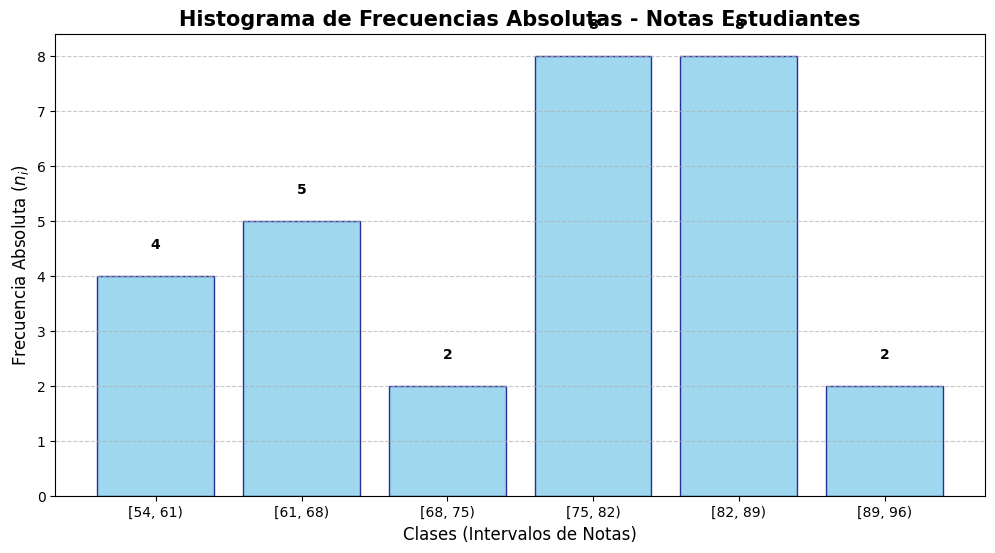

In [ ]:
# -------------------------------------------------------------------------
# 9. Crear Histograma de Frecuencias Absolutas (ni) Diapotiva 18 Ruta 2
# -------------------------------------------------------------------------
plt.figure(figsize=(12, 6))

# Usamos un gráfico de barras para representar el histograma basado en tu tabla df
plt.bar(df["Clase"], df["ni"], color='skyblue', edgecolor='navy', alpha=0.8)

# Personalización estética para la Facultad Barberi
plt.title('Histograma de Frecuencias Absolutas - Notas Estudiantes', fontsize=15, fontweight='bold')
plt.xlabel('Clases (Intervalos de Notas)', fontsize=12)
plt.ylabel('Frecuencia Absoluta ($n_i$)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir las etiquetas de los valores
for i, valor in enumerate(df["ni"]):
    plt.text(i, valor + 0.5, str(valor), ha='center', fontweight='bold')

# Guardar la imagen para que aparezca en tu repositorio de GitHub
plt.savefig("histograma_notas.png")

# Mostrar el gráfico
plt.show()

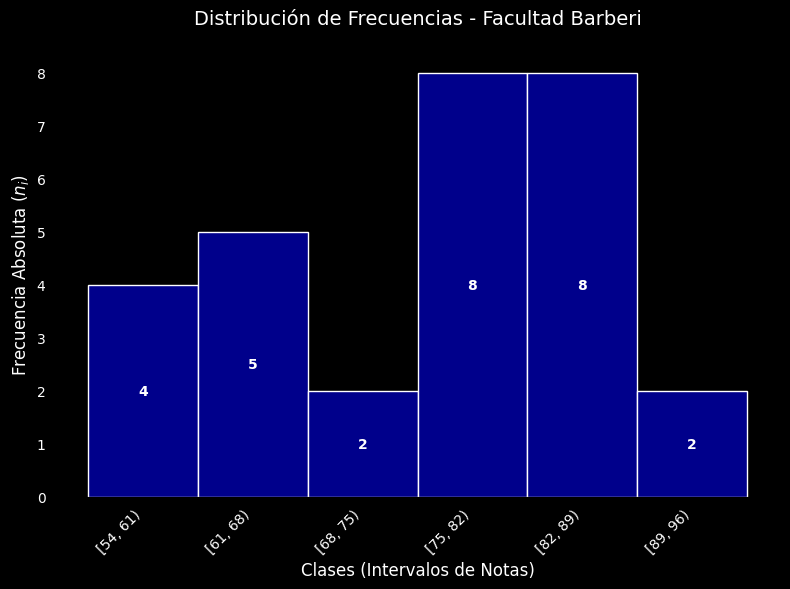

In [ ]:
# --------------------------------------------------------
# 9. Gráfico de barras (Histograma) Diapositiva 18 Ruta 2
# --------------------------------------------------------
plt.figure(figsize=(8,6))

# Dibujar barras (width=1 para que sea un histograma real)
plt.bar(df["Clase"], df["ni"], 
        color="darkblue", 
        edgecolor="white", 
        width=1) 

# Títulos y etiquetas
plt.title("Distribución de Frecuencias - Facultad Barberi", fontsize=14, color="white", pad=20)
plt.xlabel("Clases (Intervalos de Notas)", fontsize=12, color="white")
plt.ylabel("Frecuencia Absoluta ($n_i$)", fontsize=12, color="white")

# Añadir las etiquetas de los valores
for i, valor in enumerate(df["ni"]):
    if valor > 0: 
        plt.text(i, valor / 2, str(valor), 
                 ha='center', va='center', 
                 color='white', fontweight='bold', fontsize=10)

# Configuración estética de los ejes
plt.xticks(color="white", rotation=45, ha="right") # 'right' mejora la lectura si los nombres son largos
plt.yticks(color="white")

# Aplicar fondo oscuro institucional
plt.gca().set_facecolor("black")
plt.gcf().patch.set_facecolor("black")

# Ajustar y mostrar
plt.tight_layout()
plt.show()

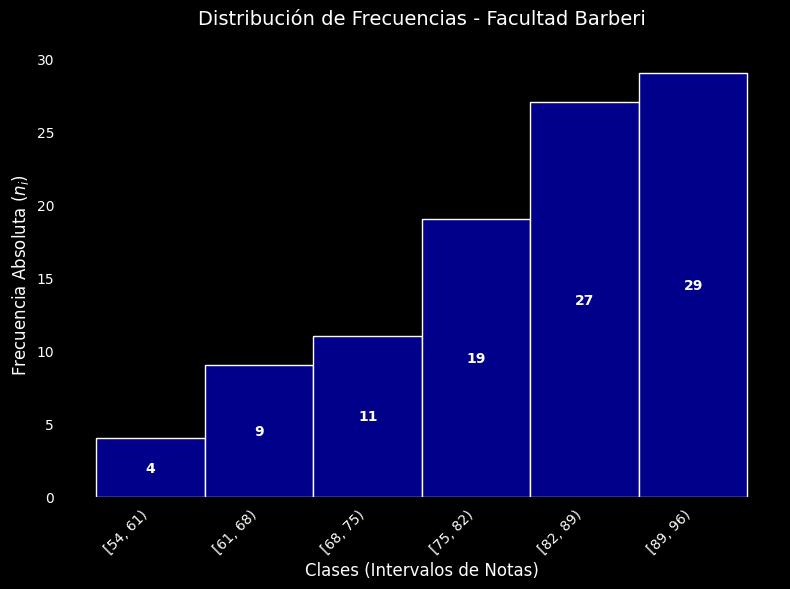

In [ ]:
# ---------------------------------------------------------
# 9. Gráfico de barras (Histograma) Diapositiva 19 ruta 2
# ---------------------------------------------------------
plt.figure(figsize=(8,6))

# Dibujar barras (width=1 para que sea un histograma real)
plt.bar(df["Clase"], df["Ni"], 
        color="darkblue", 
        edgecolor="white", 
        width=1) 

# Títulos y etiquetas
plt.title("Distribución de Frecuencias - Facultad Barberi", fontsize=14, color="white", pad=20)
plt.xlabel("Clases (Intervalos de Notas)", fontsize=12, color="white")
plt.ylabel("Frecuencia Absoluta ($n_i$)", fontsize=12, color="white")

# Añadir las etiquetas de los valores ni DENTRO de cada barra
for i, valor in enumerate(df["Ni"]):
    if valor > 0: 
        plt.text(i, valor / 2, str(valor), 
                 ha='center', va='center', 
                 color='white', fontweight='bold', fontsize=10)

# Configuración estética de los ejes
plt.xticks(color="white", rotation=45, ha="right") # 'right' mejora la lectura si los nombres son largos
plt.yticks(color="white")

# Aplicar fondo oscuro institucional
plt.gca().set_facecolor("black")
plt.gcf().patch.set_facecolor("black")

# Ajustar y mostrar
plt.tight_layout()
plt.show()

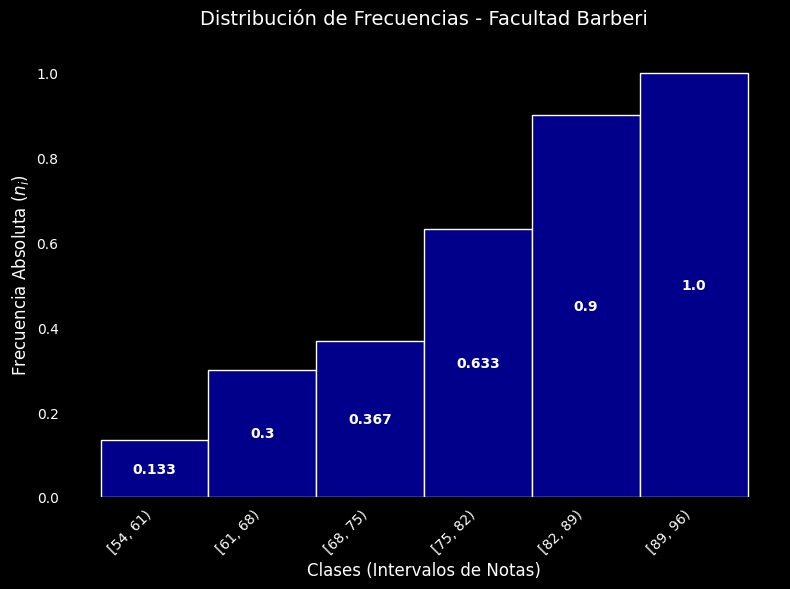

In [ ]:
# --------------------------------------------------------
# 9. Gráfico de barras (Histograma) Diapositiva 19 ruta 2
# ---------------------------------------------------------
plt.figure(figsize=(8,6))

# Dibujar barras (width=1 para que sea un histograma real)
plt.bar(df["Clase"], df["Hi"], 
        color="darkblue", 
        edgecolor="white", 
        width=1) 

# Títulos y etiquetas
plt.title("Distribución de Frecuencias - Facultad Barberi", fontsize=14, color="white", pad=20)
plt.xlabel("Clases (Intervalos de Notas)", fontsize=12, color="white")
plt.ylabel("Frecuencia Absoluta ($n_i$)", fontsize=12, color="white")

# Añadir las etiquetas de los valores ni DENTRO de cada barra
for i, valor in enumerate(df["Hi"]):
    if valor > 0: 
        plt.text(i, valor / 2, str(valor), 
                 ha='center', va='center', 
                 color='white', fontweight='bold', fontsize=10)

# Configuración estética de los ejes
plt.xticks(color="white", rotation=45, ha="right") # 'right' mejora la lectura si los nombres son largos
plt.yticks(color="white")

# Aplicar fondo oscuro institucional
plt.gca().set_facecolor("black")
plt.gcf().patch.set_facecolor("black")

# Ajustar y mostrar
plt.tight_layout()
plt.show()

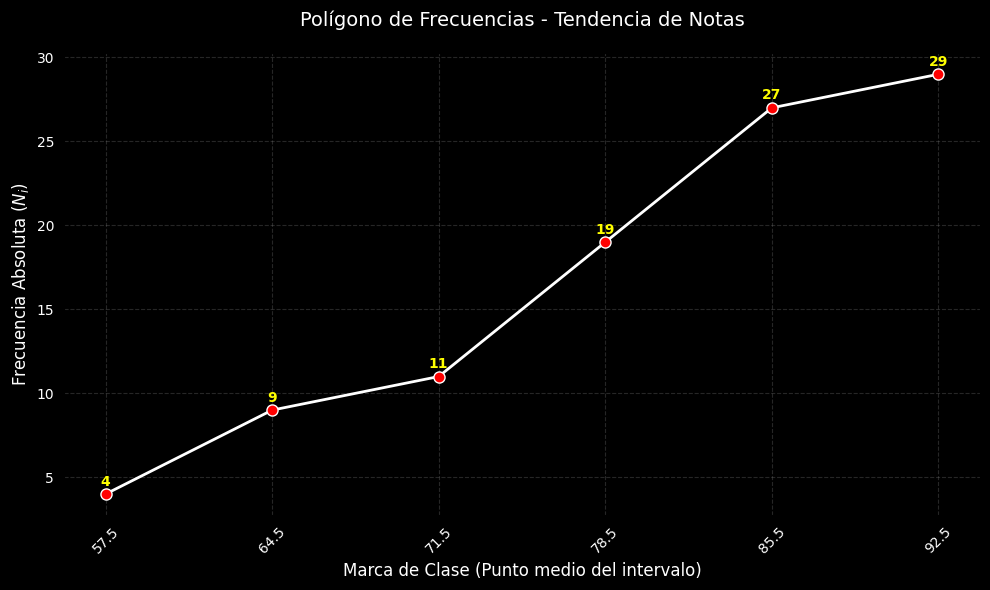

In [ ]:
# ------------------------------------------------------------------------
# 9. Polígono de Frecuencias (Línea de Tendencia) Diapositiva 19 ruta 2
# -------------------------------------------------------------------------
plt.figure(figsize=(10,6))

# Reemplazamos plt.bar por plt.plot
# Usamos "Marca de Clase" en el eje X para que la línea pase por el centro
plt.plot(df["Marca de clase"], df["Ni"], 
         color="white",      # Línea blanca para resaltar en fondo negro
         marker="o",         # Círculos en cada punto
         markersize=8, 
         markerfacecolor="red", # Puntos rojos para identificar las frecuencias
         linewidth=2, 
         label="Tendencia de Notas")

# Títulos y etiquetas 
plt.title("Polígono de Frecuencias - Tendencia de Notas", fontsize=14, color="white", pad=20)
plt.xlabel("Marca de Clase (Punto medio del intervalo)", fontsize=12, color="white")
plt.ylabel("Frecuencia Absoluta ($N_i$)", fontsize=12, color="white")

# Añadir las etiquetas
for i, valor in enumerate(df["Ni"]):
    plt.text(df["Marca de clase"][i], valor + 0.5, str(valor), 
             ha='center', color='yellow', fontweight='bold')

# Configuración de los ejes
plt.xticks(df["Marca de clase"], color="white", rotation=45)
plt.yticks(color="white")

# Fondo oscuro institucional
plt.gca().set_facecolor("black")
plt.gcf().patch.set_facecolor("black")
plt.grid(color='gray', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()